### Importing the dependencies

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")

# Loading the data
df = pd.read_csv('/content/Combined_CleanData_V2.csv')

# Univariate data analysis 🔍

In [24]:
# Checking the shape of the dataframe
df.shape

(3735, 25)

In [25]:
# Checking first 3 rows of the dataframe
df.head(2)

,property_name,Property_Type,society,sector,price,Price_Per_SQFT,bedRoom,bathroom,balcony,address,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,sector 7,0.45,5000.0,2.0,2.0,1,"Krishna Colony, Gurgaon, Haryana",...,NaN,NaN,900.0,0,0,0,0,0,2,28.0
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,"46b, Ashok Vihar, Gurgaon, Haryana",...,NaN,NaN,650.0,0,0,0,0,0,2,37.0


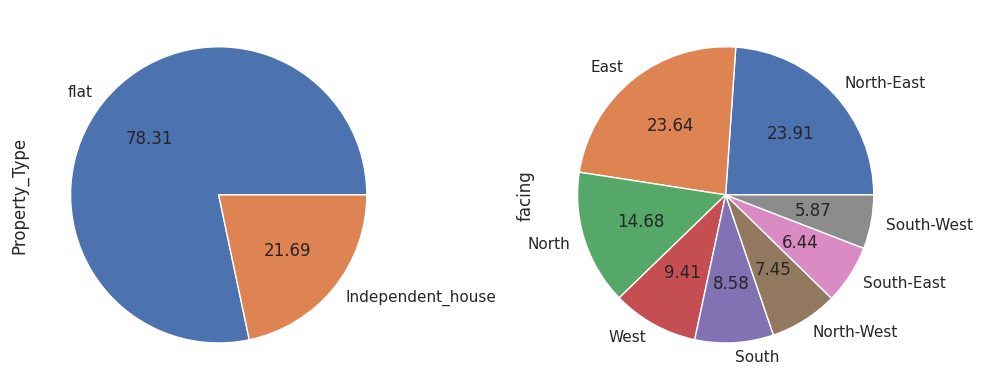

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
df['Property_Type'].value_counts().plot(kind='pie', ax=axs[0], autopct='%.2f')
df['facing'].value_counts().plot(kind='pie', ax=axs[1], autopct='%.2f')

plt.tight_layout()
plt.show()

Analysis result
- Most of the properties in our dataset are flats
- People usually prefer to take the houses facing towards (North,East and North-east) direction and the reason according to the vastu is that The North direction bestows us with the vital “Jaivic” energy while the East direction gives us the all important “Pranic Energy”. Both of these energies are essential for human existence and growth.

In [27]:
# Let's find which property have more defined directions
df.groupby('Property_Type')['facing'].count().sort_values(ascending=False)

Property_Type
flat                 2088
Independent_house     568
Name: facing, dtype: int64

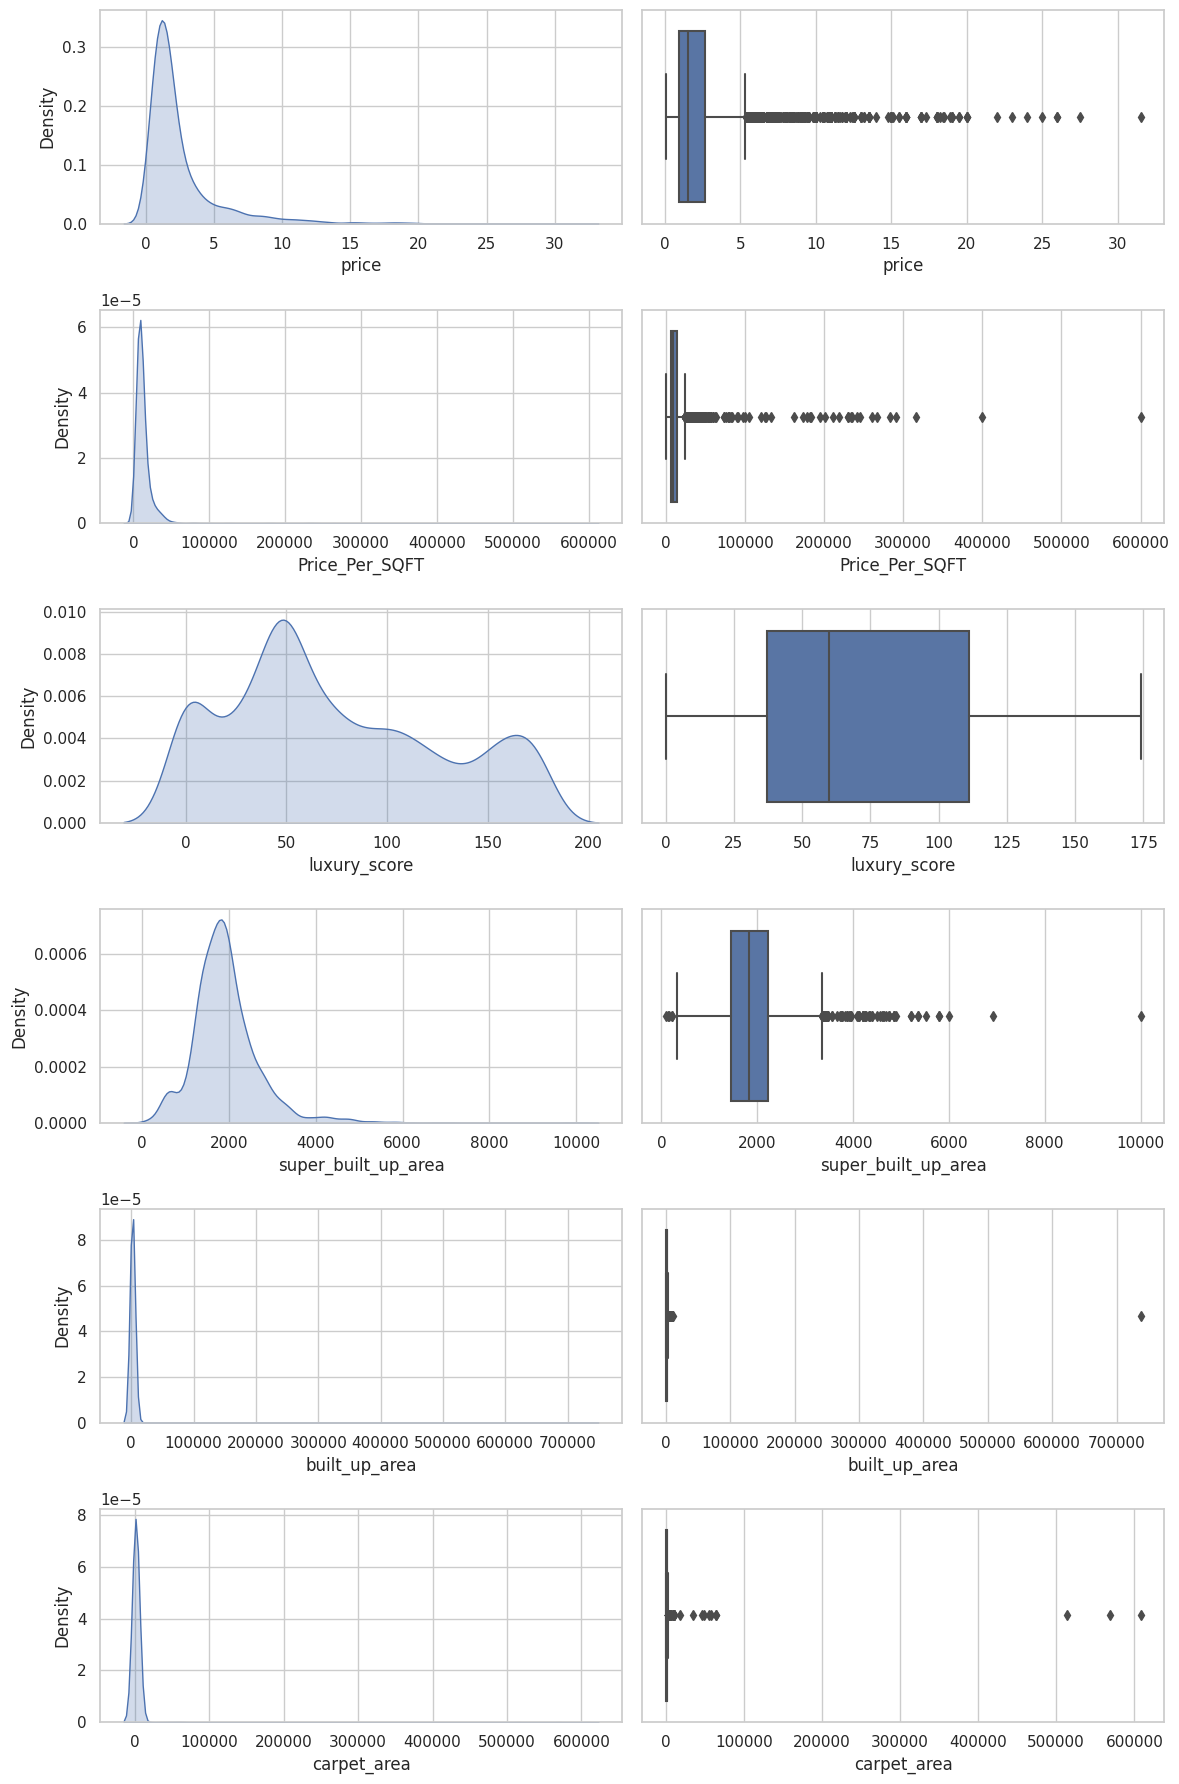

In [28]:
fig, axs = plt.subplots(6, 2, figsize=(12, 18))

# Plotting price
sns.kdeplot(df['price'], ax=axs[0, 0], shade=True)
sns.boxplot(data=df, x='price', ax=axs[0, 1])

# Plotting Price_Per_SQFT
sns.kdeplot(df['Price_Per_SQFT'], ax=axs[1,0], shade=True)
sns.boxplot(data=df, x='Price_Per_SQFT', ax=axs[1, 1])

# Plotting luxury_score
sns.kdeplot(df['luxury_score'], ax=axs[2, 0], shade=True)
sns.boxplot(data=df, x='luxury_score', ax=axs[2, 1])

# Adding more rows for additional features
sns.kdeplot(df['super_built_up_area'], ax=axs[3, 0], shade=True)
sns.boxplot(data=df, x='super_built_up_area', ax=axs[3, 1])

sns.kdeplot(df['built_up_area'], ax=axs[4, 0], shade=True)
sns.boxplot(data=df, x='built_up_area', ax=axs[4, 1])

sns.kdeplot(df['carpet_area'], ax=axs[5,0], shade=True)
sns.boxplot(data=df, x='carpet_area', ax=axs[5,1])

plt.tight_layout()
plt.show()

Analysis result:
- Other than the feature luxury score almost all the other features are having some outliers. So in order to deal with them we need to be aware about why these data points are behaving as outliers.

In [29]:
# Removing extreme outliers
indices_to_remove = df[
    (df['built_up_area'] > 700000) |
    (df['super_built_up_area'] > 6500) |
    (df['carpet_area'] > 500000)
].index

# Remove rows based on the obtained indices
df = df[~df.index.isin(indices_to_remove)]

# Univariate analysis 🔍
Up until now, we've focused on cleaning and enhancing some features. However, to perform more sophisticated feature engineering, we require a comprehensive understanding of each feature. In the next section, we'll begin by conducting univariate analysis to gain a better understanding of each individual feature.

- What is frequency count of flats and Independent houses in our dataframe ?
- Out of flats and houses which one have more price ?

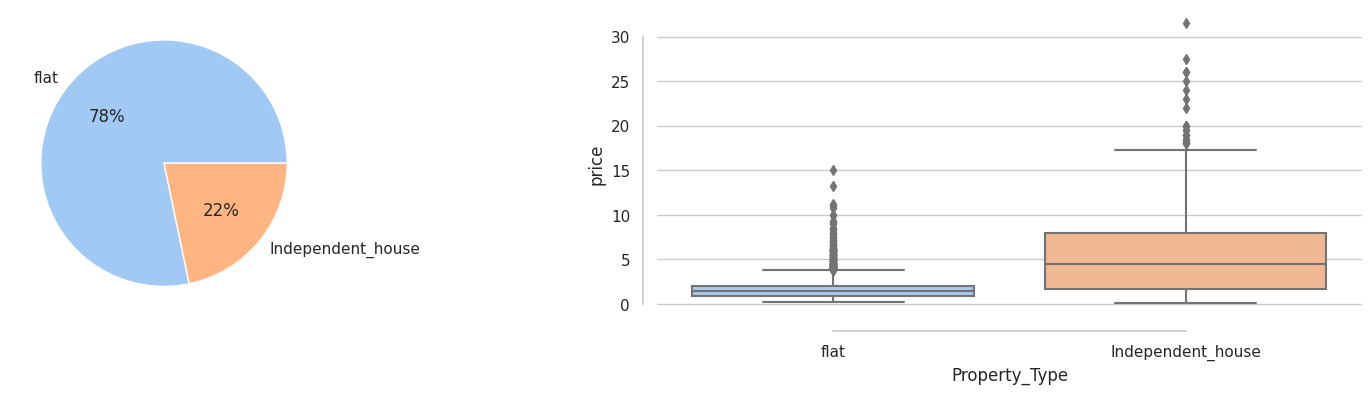

In [30]:
fig,ax = plt.subplots(1,2,figsize=(20,4))

colors = sns.color_palette('pastel')[0:7]
ax[0].pie(x = df['Property_Type'].value_counts().values, labels = df['Property_Type'].value_counts().index, colors = colors, autopct='%.0f%%')


sns.boxplot(x="Property_Type", y="price", palette=sns.color_palette("pastel"),ax = ax[1],data=df)
sns.despine(offset=10, trim=True)

plt.show()

In [31]:
def overview_feature(feature_name):
  """
  This function will take the feature name as input and will return the count of missing values
  and basic statistical summary
  """
  Nan_ct = df[feature_name].isnull().sum()
  info_series = df[feature_name].describe()
  return (Nan_ct,info_series)

### Feature ▶️ price

In [32]:
Nan_ct,info_series = overview_feature('price')
print("Missing value count : ",Nan_ct)
print(info_series)

Missing value count :  17
count    3712.000000
mean        2.514011
std         2.945508
min         0.070000
25%         0.950000
50%         1.520000
75%         2.700000
max        31.500000
Name: price, dtype: float64


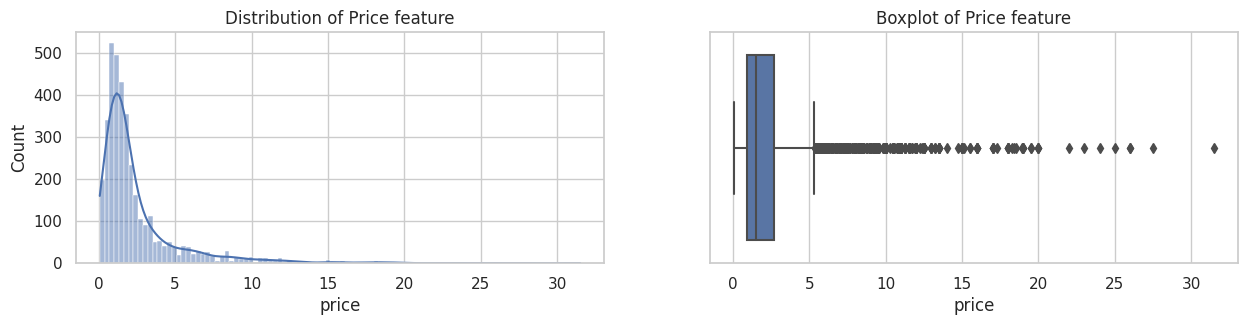

In [45]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['price'],kde=True,ax = ax[0],bins=100)
ax[0].set_title("Distribution of Price feature")

sns.boxplot(x = df['price'],ax = ax[1])
ax[1].set_title("Boxplot of Price feature")
plt.show()

In [44]:
df[df['price']>15]['Property_Type'].value_counts()

Independent_house    38
Name: Property_Type, dtype: int64

### Observations (Feature : price) 🕵🏼

**Descriptive Statistics**:

- Count: There are 3796 non-missing price entries.
- Mean Price: The average price is approximately 2.51 crores.
- Median Price: The median (or 50th percentile) price is 1.50 crores.
- Since there is a significant difference between the mean and the 50% percentile value of `price` feature, thus there may be a possibility of outliers. This is because outliers can skew the mean value, making it different from the median value.
- Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
- Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.

**Distribution**:
- The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

# Feature : Price_Per_SQFT

In [ ]:
print("Missing values in Price_Per_SQFT feature are : ",df['Price_Per_SQFT'].isnull().sum())
df['Price_Per_SQFT'].describe()

Missing values in Price_Per_SQFT feature are :  0


count      3796.000000
mean      13744.074025
std       22624.518887
min           4.000000
25%        6812.000000
50%        9013.500000
75%       13888.000000
max      600000.000000
Name: Price_Per_SQFT, dtype: float64

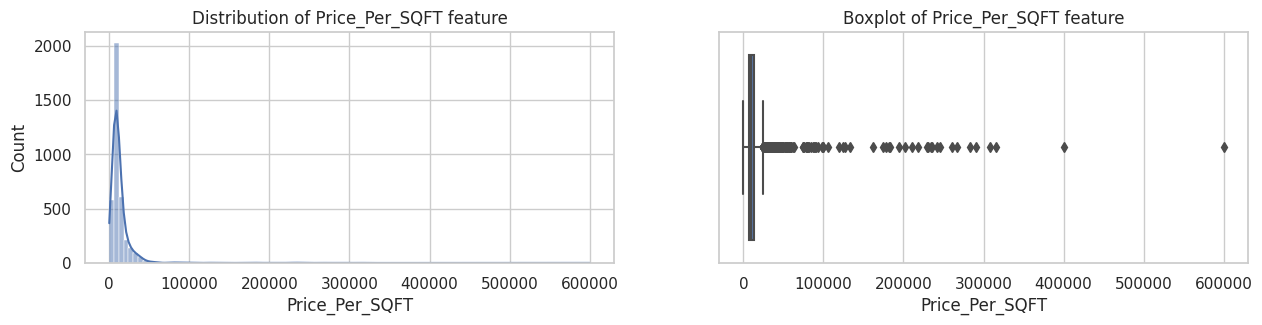

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0],bins=100)
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

### Observations (Feature : price) 🕵🏼

**Descriptive Statistics**:

- Count: There are 3796 non-missing price entries.
- Mean Price: The average price is approximately Rs 13744.
- Median Price: The median (or 50th percentile) price is Rs 9013.
- Since there is a significant difference between the mean and the 50% percentile value of `Price_Per_SQFT` feature, thus there may be a possibility of outliers. This is because outliers can skew the mean value, making it different from the median value.
- Standard Deviation: The prices have a standard deviation of Rs 22624, indicating variability in the prices.
- Range: Prices range from a minimum of Rs 4 crores to a maximum of Rs 600000.

# Feature : bedRoom,bathRoom and balcony

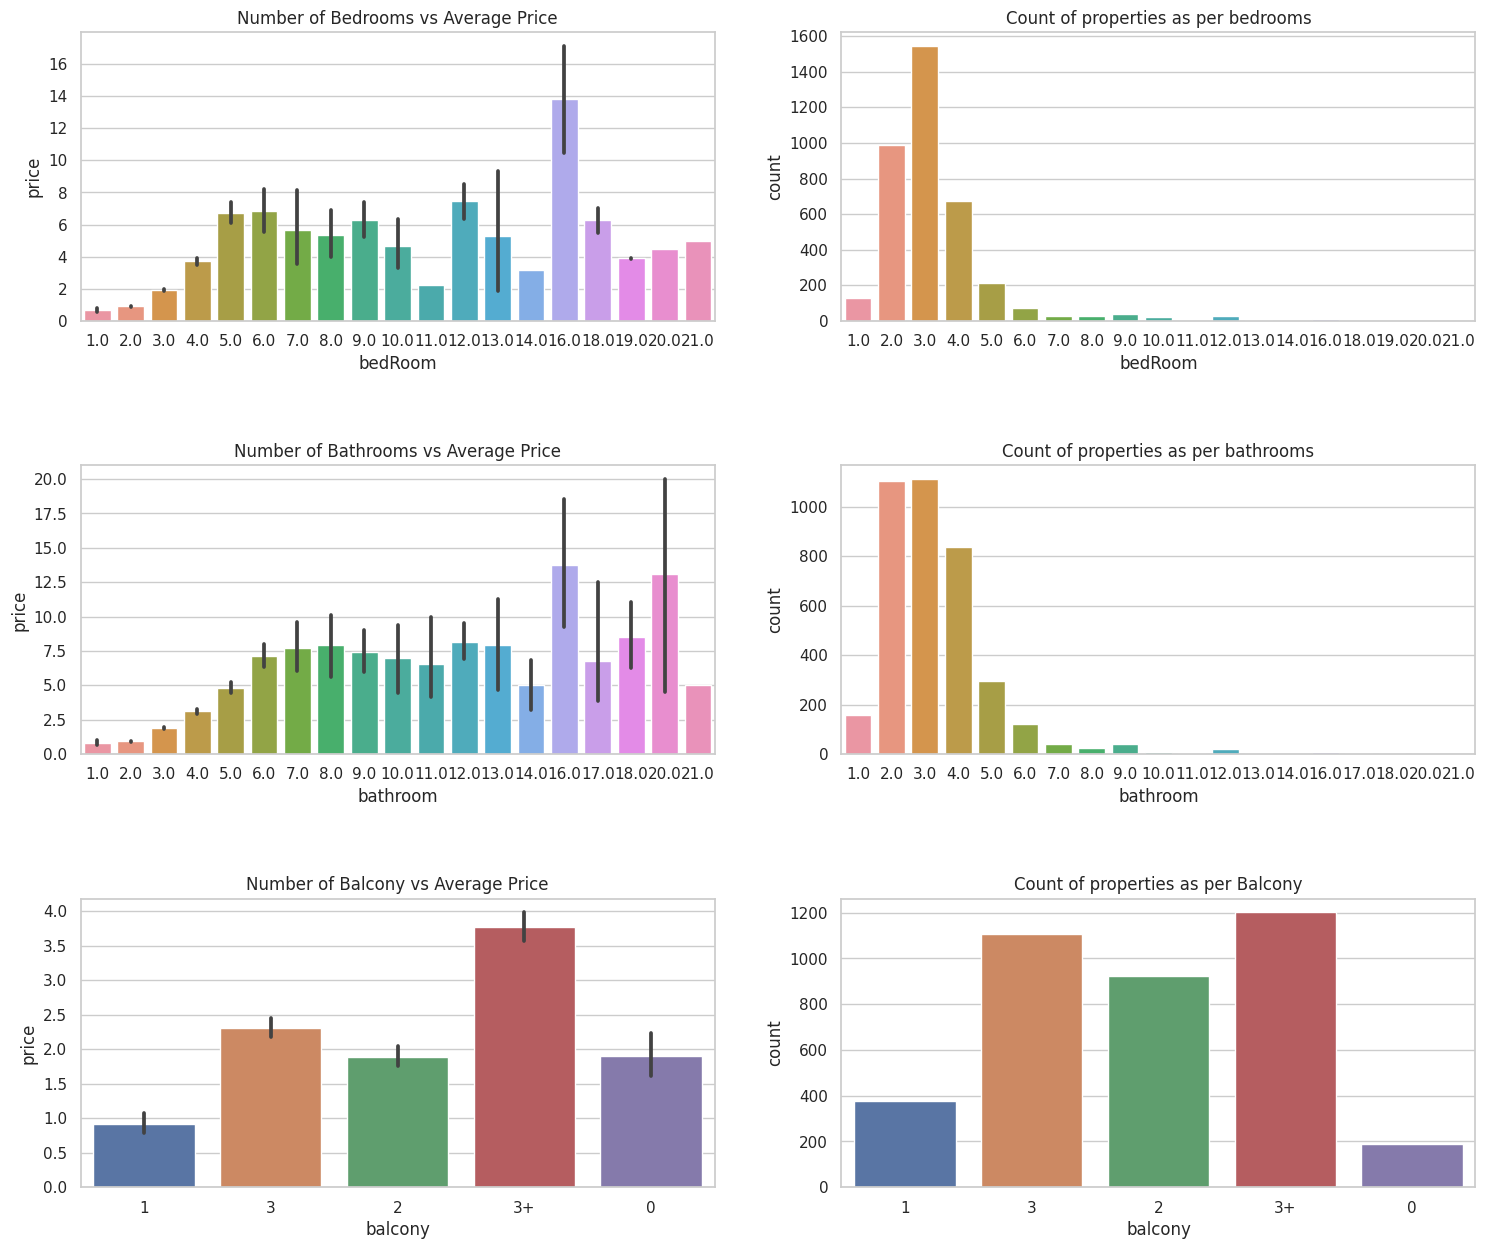

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(18,15))

sns.barplot(data=df, x="bedRoom", y="price",ax = ax[0][0])
ax[0][0].set_title("Number of Bedrooms vs Average Price")
sns.countplot(x=df["bedRoom"],ax = ax[0][1])
ax[0][1].set_title("Count of properties as per bedrooms")

sns.barplot(data=df, x="bathroom", y="price",ax = ax[1][0])
ax[1][0].set_title("Number of Bathrooms vs Average Price")
sns.countplot(x=df["bathroom"],ax = ax[1][1])
ax[1][1].set_title("Count of properties as per bathrooms")

sns.barplot(data=df, x="balcony", y="price",ax = ax[2][0])
ax[2][0].set_title("Number of Balcony vs Average Price")
sns.countplot(x=df["balcony"],ax = ax[2][1])
ax[2][1].set_title("Count of properties as per Balcony")

plt.subplots_adjust(hspace = 0.5)
plt.show()

# Feature : floorNum and facing
- How price vary with the floor number and facing ?
- Most of the flats are on which floor number ?
- Most of the properties are facing which direction?

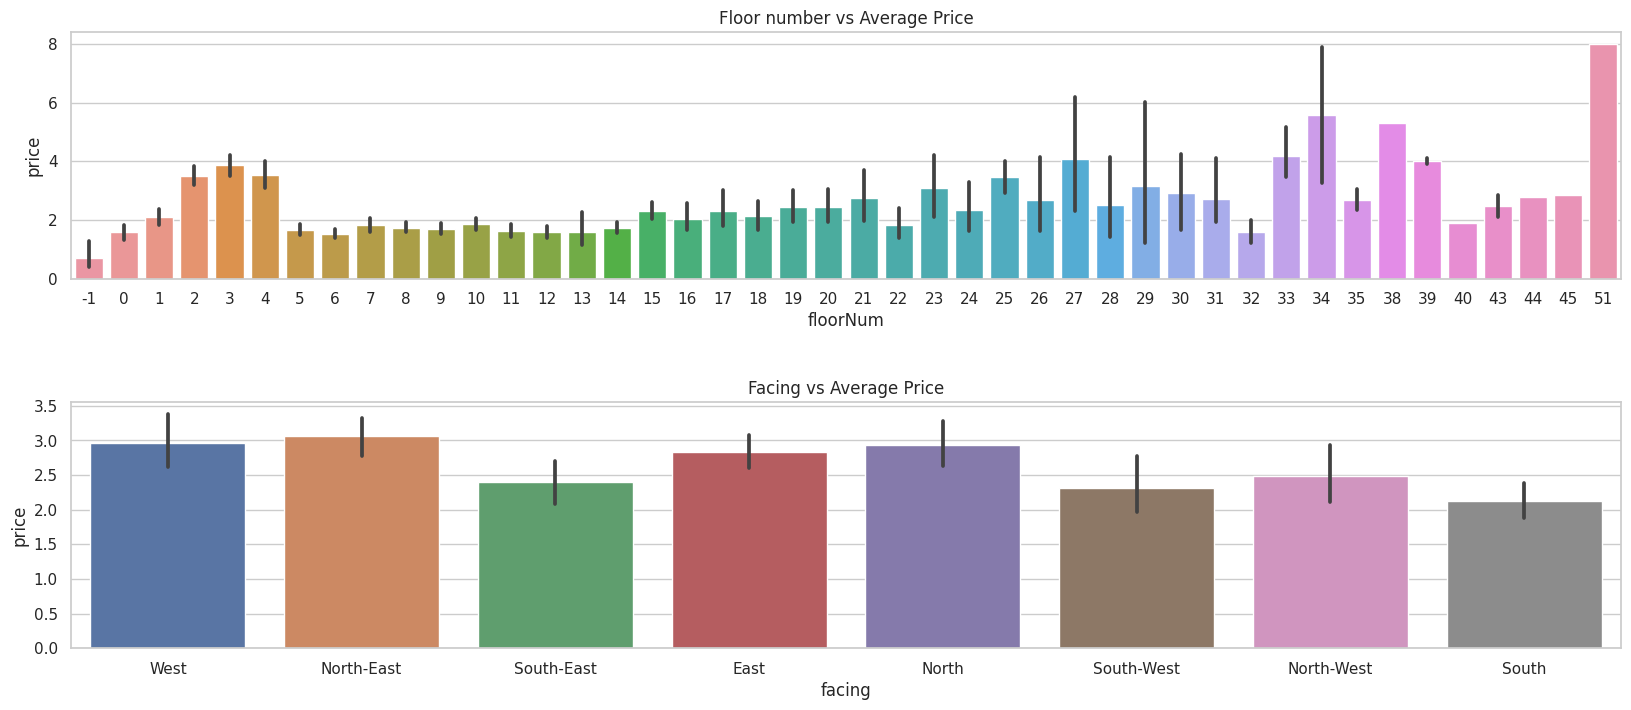

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,8))

sns.barplot(data=df, x="floorNum", y="price",ax = ax[0])
ax[0].set_title("Floor number vs Average Price")
sns.barplot(data=df, x="facing", y="price",ax = ax[1])
ax[1].set_title("Facing vs Average Price")

plt.subplots_adjust(hspace = 0.5)
plt.show()